In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
csv_path = './data/probe_known_attacks_small.csv'

In [3]:
df = pd.read_csv(csv_path, low_memory=False)

In [4]:
df.shape

(85060, 51)

In [5]:
df.columns

Index(['ip_type', 'ip_len', 'ip_id', 'ip_offset', 'ip_RF', 'ip_DF', 'ip_MF',
       'ip_proto', 'ip_checksum', 'udp_sport', 'udp_dport', 'udp_len',
       'udp_chk', 'icmp_type', 'icmp_code', 'icmp_chk', 'tcp_sport',
       'tcp_dport', 'tcp_seq', 'tcp_ack', 'tcp_ffyn', 'tcp_fsyn', 'tcp_frst',
       'tcp_fpush', 'tcp_fack', 'tcp_furg', 'fr_length', 'conn_status',
       'count_fr_src_dst', 'count_fr_dst_src', 'count_serv_src_dst',
       'count_serv_dst_src', 'num_bytes_src_dst', 'num_bytes_dst_src',
       'num_bytes_serv_src_dst', 'num_bytes_serv_dst_src',
       'num_pushed_src_dst', 'num_pushed_dst_src', 'num_syn_fin_src_dst',
       'num_syn_fin_dst_src', 'num_fin_src_dst', 'num_fin_dst_src',
       'num_ack_src_dst', 'num_ack_dst_src', 'num_syn_src_dst',
       'num_syn_dst_src', 'num_rst_src_dst', 'num_rst_dst_src', 'first_packet',
       'first_serv_packet', 'class'],
      dtype='object')

In [6]:
df.head()

,ip_type,ip_len,ip_id,ip_offset,ip_RF,ip_DF,ip_MF,ip_proto,ip_checksum,udp_sport,...,num_fin_dst_src,num_ack_src_dst,num_ack_dst_src,num_syn_src_dst,num_syn_dst_src,num_rst_src_dst,num_rst_dst_src,first_packet,first_serv_packet,class
0,0,552,13968,0,0,0,0,6,49165,0,...,0,415,579,1,1,0,0,0,0,normal
1,0,552,13969,0,0,0,0,6,49164,0,...,0,415,580,1,1,0,0,0,0,normal
2,0,40,25941,0,0,0,0,6,44274,0,...,0,1,0,0,0,0,0,1,1,attack
3,0,52,56525,0,0,1,0,6,56195,0,...,0,30,37,1,1,0,0,0,0,normal
4,0,52,27415,0,0,1,0,6,19834,0,...,0,416,580,1,1,0,0,0,0,normal


In [7]:
df.describe(include="all")

,ip_type,ip_len,ip_id,ip_offset,ip_RF,ip_DF,ip_MF,ip_proto,ip_checksum,udp_sport,...,num_fin_dst_src,num_ack_src_dst,num_ack_dst_src,num_syn_src_dst,num_syn_dst_src,num_rst_src_dst,num_rst_dst_src,first_packet,first_serv_packet,class
count,85060.000000,85060.000000,85060.000000,85060.0,85060.0,85060.000000,85060.0,85060.000000,85060.000000,85060.000000,...,85060.000000,85060.000000,85060.000000,85060.000000,85060.000000,85060.000000,85060.000000,85060.000000,85060.000000,85060
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48432
mean,0.754667,100.386174,31165.699577,0.0,0.0,0.363931,0.0,8.039925,33087.734246,7335.142699,...,19.918340,162.481060,265.684047,113.913144,30.737621,37.778486,140.026957,0.003492,0.089560,NaN
std,5.925130,191.572060,19906.379891,0.0,0.0,0.481132,0.0,4.450021,18710.567547,17846.337785,...,968.524034,1637.743817,1173.387641,1556.568989,1363.660077,1310.832438,666.280141,0.058987,0.285552,NaN
min,0.000000,28.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,40.000000,14018.000000,0.0,0.0,0.000000,0.0,6.000000,16980.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,52.000000,31076.500000,0.0,0.0,0.000000,0.0,6.000000,34049.500000,0.000000,...,0.000000,11.000000,77.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN
75%,0.000000,60.000000,48434.500000,0.0,0.0,1.000000,0.0,6.000000,47231.000000,0.000000,...,1.000000,135.000000,384.000000,3.000000,2.000000,0.000000,78.000000,0.000000,0.000000,NaN


It seems as though ip_RF, ip_MF, and ip_offset do not contain any valuable information. They can be removed

In [8]:
df = df.drop(columns=["ip_RF", "ip_MF", "ip_offset"])

In [9]:
df.columns

Index(['ip_type', 'ip_len', 'ip_id', 'ip_DF', 'ip_proto', 'ip_checksum',
       'udp_sport', 'udp_dport', 'udp_len', 'udp_chk', 'icmp_type',
       'icmp_code', 'icmp_chk', 'tcp_sport', 'tcp_dport', 'tcp_seq', 'tcp_ack',
       'tcp_ffyn', 'tcp_fsyn', 'tcp_frst', 'tcp_fpush', 'tcp_fack', 'tcp_furg',
       'fr_length', 'conn_status', 'count_fr_src_dst', 'count_fr_dst_src',
       'count_serv_src_dst', 'count_serv_dst_src', 'num_bytes_src_dst',
       'num_bytes_dst_src', 'num_bytes_serv_src_dst', 'num_bytes_serv_dst_src',
       'num_pushed_src_dst', 'num_pushed_dst_src', 'num_syn_fin_src_dst',
       'num_syn_fin_dst_src', 'num_fin_src_dst', 'num_fin_dst_src',
       'num_ack_src_dst', 'num_ack_dst_src', 'num_syn_src_dst',
       'num_syn_dst_src', 'num_rst_src_dst', 'num_rst_dst_src', 'first_packet',
       'first_serv_packet', 'class'],
      dtype='object')

In [10]:
print(df["class"].value_counts())
print(df["class"].value_counts(normalize=True) * 100)

class
normal    48432
attack    36628
Name: count, dtype: int64
class
normal    56.938632
attack    43.061368
Name: proportion, dtype: float64


In [11]:
df.dtypes

ip_type                    int64
ip_len                     int64
ip_id                      int64
ip_DF                      int64
ip_proto                   int64
ip_checksum                int64
udp_sport                  int64
udp_dport                  int64
udp_len                    int64
udp_chk                    int64
icmp_type                  int64
icmp_code                  int64
icmp_chk                   int64
tcp_sport                  int64
tcp_dport                  int64
tcp_seq                    int64
tcp_ack                    int64
tcp_ffyn                   int64
tcp_fsyn                   int64
tcp_frst                   int64
tcp_fpush                  int64
tcp_fack                   int64
tcp_furg                   int64
fr_length                  int64
conn_status                int64
count_fr_src_dst           int64
count_fr_dst_src           int64
count_serv_src_dst         int64
count_serv_dst_src         int64
num_bytes_src_dst          int64
num_bytes_

In [12]:
df["ip_type"].value_counts()

ip_type
0      83516
40      1528
192       16
Name: count, dtype: int64

In [13]:
df["class"] = df["class"].replace({"normal": 0, "attack": 1})

In [14]:
corr = df.corr()

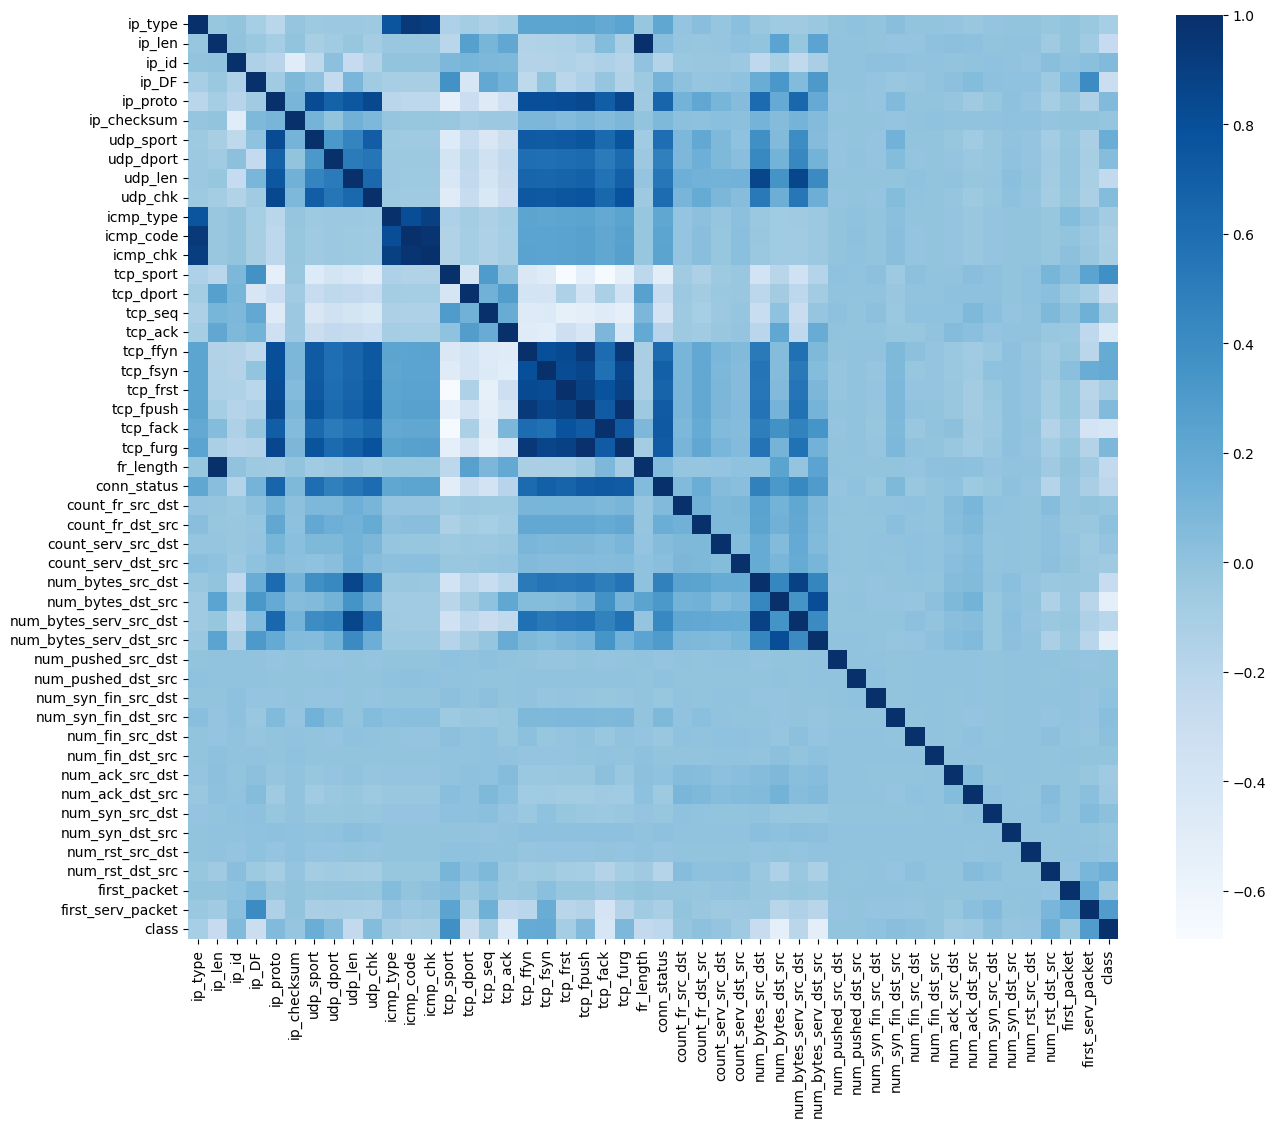

In [15]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap="Blues")
plt.show()

In [16]:
corr["class"].sort_values(ascending=False)

class                     1.000000
tcp_sport                 0.376711
first_serv_packet         0.288401
tcp_fsyn                  0.183862
tcp_ffyn                  0.179369
udp_sport                 0.159150
num_rst_dst_src           0.148479
tcp_furg                  0.081623
ip_id                     0.070370
ip_proto                  0.068846
tcp_fpush                 0.068064
udp_chk                   0.050838
udp_dport                 0.043169
num_syn_fin_dst_src       0.032562
num_syn_src_dst           0.023503
num_fin_src_dst           0.018179
count_fr_dst_src          0.016557
num_syn_fin_src_dst       0.010139
num_pushed_src_dst       -0.005405
num_pushed_dst_src       -0.006834
num_fin_dst_src          -0.008403
num_rst_src_dst          -0.008925
count_serv_src_dst       -0.010181
ip_checksum              -0.015762
num_syn_dst_src          -0.017306
count_fr_src_dst         -0.018505
first_packet             -0.032560
num_ack_dst_src          -0.042007
num_ack_src_dst     

The target feature does not seem to have very strong correlations with any particular feature.

In [17]:
# remove all features with an absolute correlation of less than 0.1
cols_corr_gt1 = corr["class"][abs(corr["class"]) > 0.1].index

In [18]:
print(cols_corr_gt1)
print(len(cols_corr_gt1))

Index(['ip_len', 'ip_DF', 'udp_sport', 'udp_len', 'icmp_code', 'icmp_chk',
       'tcp_sport', 'tcp_dport', 'tcp_ack', 'tcp_ffyn', 'tcp_fsyn', 'tcp_fack',
       'fr_length', 'conn_status', 'num_bytes_src_dst', 'num_bytes_dst_src',
       'num_bytes_serv_src_dst', 'num_bytes_serv_dst_src', 'num_rst_dst_src',
       'first_serv_packet', 'class'],
      dtype='object')
21


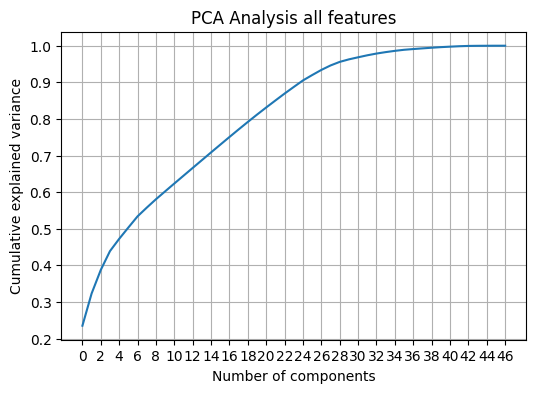

In [19]:
X = df.drop(columns=["class"])
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=len(df.columns)-1)
X_pca = pca.fit_transform(X_scaled)

pca_cumsum = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(6,4))
plt.plot(pca_cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Analysis all features")
plt.grid()
plt.xticks(range(0, len(df.columns)-1, 2))
plt.show()

In [20]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]

28

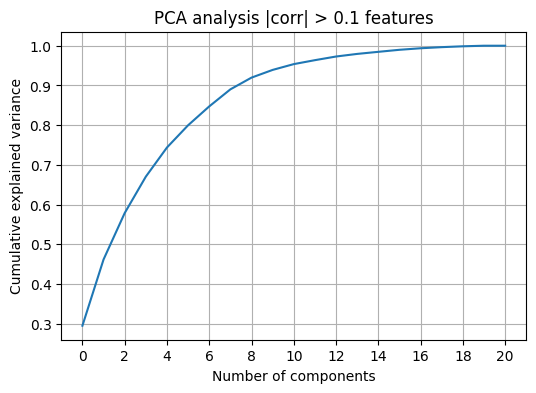

In [21]:
X = df[cols_corr_gt1]
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=len(cols_corr_gt1))
X_pca = pca.fit_transform(X_scaled)

pca_cumsum = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(6,4))
plt.plot(pca_cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA analysis |corr| > 0.1 features")
plt.grid()
plt.xticks(range(0, len(cols_corr_gt1), 2))
plt.show()

In [22]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]

10

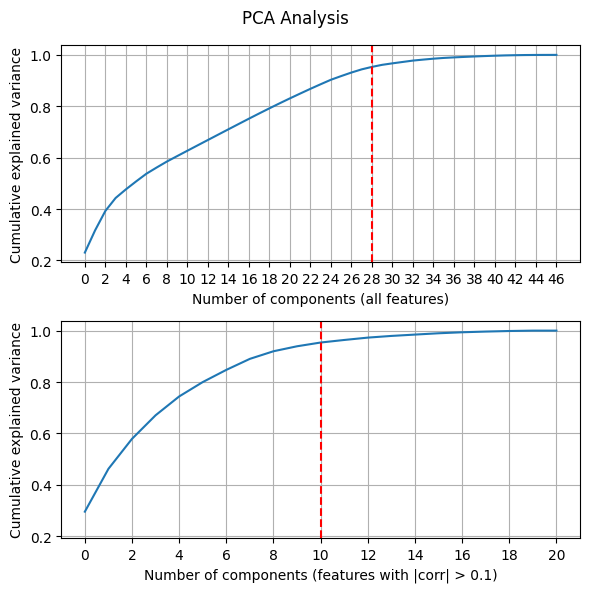

In [23]:
fig, ax = plt.subplots(2, figsize=(6,6), sharey=True)

X = df.copy()
y = df["class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=len(df.columns)-1)
X_pca = pca.fit_transform(X_scaled)
pca_cumsum = pca.explained_variance_ratio_.cumsum()
x95 = np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]
ax[0].plot(pca_cumsum)
ax[0].set_xlabel("Number of components (all features)")
ax[0].set_ylabel("Cumulative explained variance")
ax[0].axvline(x95, linestyle="--", color="red")
ax[0].grid()
ax[0].set_xticks(range(0, len(df.columns)-1, 2))

X = df[cols_corr_gt1]
y = df["class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=len(cols_corr_gt1))
X_pca = pca.fit_transform(X_scaled)
pca_cumsum = pca.explained_variance_ratio_.cumsum()
x95 = np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]
ax[1].plot(pca_cumsum)
ax[1].set_xlabel("Number of components (features with |corr| > 0.1)")
ax[1].set_ylabel("Cumulative explained variance")
ax[1].axvline(x95, linestyle="--", color="red")
ax[1].grid()
ax[1].set_xticks(range(0, len(cols_corr_gt1), 2))
plt.suptitle("PCA Analysis")
plt.tight_layout()
plt.show()